# Quickstart/Cheat-Sheet

The gist of it

To start using `pyglotaran` in your project, you have to import it first.
In addition we need to import some extra components for later use.

In [1]:
%matplotlib inline

The last import is a little ipython helper function to display files with syntax highlighting when running inside a jupyter-notebook.## Loading a dataset 

Let us get some example data to analyze:

## Loading and plotting raw data 

Let us get some example data to analyze:

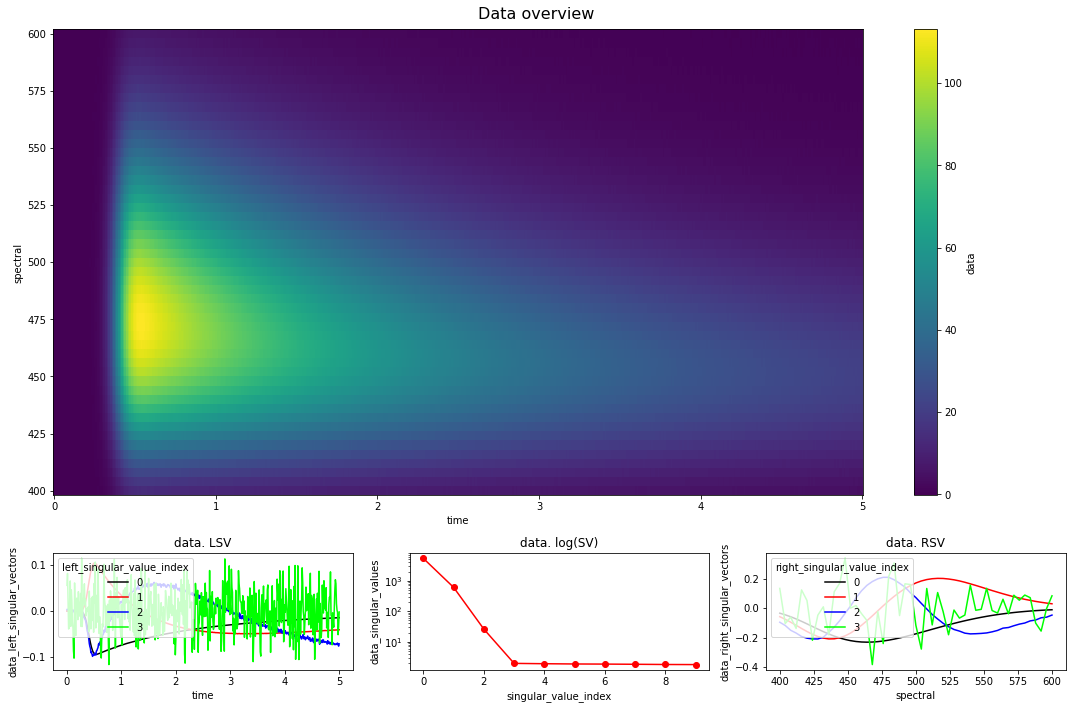

In [2]:
from glotaran.io import load_dataset
from pyglotaran_extras import plot_data_overview

dataset = load_dataset("data/data.ascii")

fig_data, axes_data = plot_data_overview(dataset, figsize=(15, 10))

## Working with models

To analyze our data, we need to create a model. 

Create a file called `model.yaml` in your working directory and fill it with the following:

In [3]:
from glotaran.utils.ipython import display_file

display_file("model.yaml", syntax="yaml")

```yaml
default_megacomplex: decay

initial_concentration:
  input:
    compartments: [s1, s2, s3]
    parameters: [input.1, input.1, input.1]

k_matrix:
  k1:
    matrix:
      (s1, s1): kinetic.1
      (s2, s2): kinetic.2
      (s3, s3): kinetic.3

megacomplex:
  m1:
    k_matrix: [k1]

irf:
  irf1:
    type: gaussian
    center: irf.center
    width: irf.width

dataset:
  dataset1:
    initial_concentration: input
    megacomplex: [m1]
    irf: irf1

```

Now you can load the model file.

In [4]:
from glotaran.io import load_model

model = load_model("model.yaml")

You can check your model for problems with `model.validate`.

In [5]:
model.validate()

'Your model is valid.'

## Working with parameters

Now define some starting parameters. Create a file called `parameters.yaml` with
the following content.

In [6]:
display_file("parameters.yaml", syntax="yaml")

```yaml
input:
  - ["1", 1, { "vary": False, "non-negative": False }]
  - ["0", 0, { "vary": False, "non-negative": False }]

kinetic:
  - 0.5
  - 0.3
  - 0.1

irf:
  - ["center", 0.3]
  - ["width", 0.1]

```

In [7]:
from glotaran.io import load_parameters

parameters = load_parameters("parameters.yaml")

You can `model.validate` also to check for missing parameters.

In [8]:
model.validate(parameters=parameters)

'Your model is valid.'

Since not all problems in the model can be detected automatically it is wise to
visually inspect the model. For this purpose, you can just print the model.

In [9]:
model

### Model

_Megacomplex Types_: decay

#### K Matrix

* **k1**:
  * *Label*: k1
  * *Matrix*: 
    * *('s1', 's1')*: kinetic.1
    * *('s2', 's2')*: kinetic.2
    * *('s3', 's3')*: kinetic.3
  

#### Initial Concentration

* **input**:
  * *Label*: input
  * *Compartments*: ['s1', 's2', 's3']
  * *Parameters*: [input.1, input.1, input.1]
  * *Exclude From Normalize*: []

#### Irf

* **irf1** (gaussian):
  * *Label*: irf1
  * *Type*: gaussian
  * *Center*: irf.center
  * *Width*: irf.width
  * *Normalize*: True
  * *Backsweep*: False

#### Megacomplex

* **m1** (None):
  * *Label*: m1
  * *Dimension*: time
  * *K Matrix*: ['k1']

#### Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Group*: default
  * *Megacomplex*: ['m1']
  * *Initial Concentration*: input
  * *Irf*: irf1



The same way you should inspect your parameters.

In [10]:
parameters

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | center    |       0.3 |          0 |    -inf |     inf | True     | False            | None     |
    | width     |       0.1 |          0 |    -inf |     inf | True     | False            | None     |

  * __kinetic__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |       0.5 |          0 |    -inf |     inf | True     | False            | None     |
    |         2 |       0.3 |          0 |    -inf |     inf | True     | False            | None     |
    |         3 |       0.1 |          0 |    -inf |     inf | True     | False            | None     |



## Optimizing data

Now we have everything together to optimize our parameters. First we import optimize.

In [11]:
from glotaran.analysis.optimize import optimize
from glotaran.project import Scheme

scheme = Scheme(model, parameters, {"dataset1": dataset})
result = optimize(scheme)
result

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.0964e+05                                    6.24e+06    
       1              2         9.8399e+04      3.11e+05       6.71e-01       2.09e+06    
       2              3         9.3044e+03      8.91e+04       9.48e-01       1.20e+06    
       3              5         7.7282e+02      8.53e+03       3.35e-01       9.80e+04    
       4              7         2.8723e+02      4.86e+02       1.68e-01       1.13e+04    
       5              8         7.5269e+01      2.12e+02       3.35e-01       2.77e+04    
       6              9         5.8278e+01      1.70e+01       7.70e-02       1.79e+03    
       7             10         5.8074e+01      2.04e-01       5.27e-03       3.37e+00    
       8             11         5.8074e+01      2.31e-06       6.13e-05       1.18e-03    
       9             12         5.8074e+01      2.18e-12       1.66e-07       3.11e-05    

| Optimization Result           |                            |
|-------------------------------|----------------------------|
| Number of residual evaluation | 12                         |
| Number of variables           | 5                          |
| Number of datapoints          | 25551                      |
| Degrees of freedom            | 25546                      |
| Chi Square                    | 1.16e+02                   |
| Reduced Chi Square            | 4.55e-03                   |
| Root Mean Square Error (RMSE) | 6.74e-02                   |
| RMSE additional penalty       | [array([], dtype=float64)] |

### Model

_Megacomplex Types_: decay

#### K Matrix

* **k1**:
  * *Label*: k1
  * *Matrix*: 
    * *('s1', 's1')*: kinetic.1: **5.01484e-01** *(StdErr: 4e-03 ,initial: 5.00000e-01)*
    * *('s2', 's2')*: kinetic.2: **2.49618e-01** *(StdErr: 1e-03 ,initial: 3.00000e-01)*
    * *('s3', 's3')*: kinetic.3: **1.00182e+00** *(StdErr: 2e-03 ,initial: 1.00000e-01)*
  

#### Initial Concentration

* **input**:
  * *Label*: input
  * *Compartments*: ['s1', 's2', 's3']
  * *Parameters*: [input.1: **1.00000e+00** *(fixed)*, input.1: **1.00000e+00** *(fixed)*, input.1: **1.00000e+00** *(fixed)*]
  * *Exclude From Normalize*: []

#### Irf

* **irf1** (gaussian):
  * *Label*: irf1
  * *Type*: gaussian
  * *Center*: irf.center: **4.00004e-01** *(StdErr: 7e-06 ,initial: 3.00000e-01)*
  * *Width*: irf.width: **5.99725e-02** *(StdErr: 9e-06 ,initial: 1.00000e-01)*
  * *Normalize*: True
  * *Backsweep*: False

#### Megacomplex

* **m1** (None):
  * *Label*: m1
  * *Dimension*: time
  * *K Matrix*: ['k1']

#### Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Group*: default
  * *Megacomplex*: ['m1']
  * *Initial Concentration*: input
  * *Irf*: irf1



In [12]:
result.optimized_parameters

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | center    | 0.400004  | 6.69096e-06 |    -inf |     inf | True     | False            | None     |
    | width     | 0.0599725 | 8.75161e-06 |    -inf |     inf | True     | False            | None     |

  * __kinetic__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |  0.501484 | 0.00373482 |    -inf |     inf | True     | False            | None     |
    |         2 |  0.249618 | 0.0011573  |    -inf |     inf | True     | False            | None     |
    |         3 |  1.00182  | 0.00217779 |    -inf |     inf | True     | False            | None     |



You can get the resulting data for your dataset with `result.get_dataset`.

In [13]:
result_dataset = result.data["dataset1"]
result_dataset

<xarray.Dataset>
Dimensions:                                   (clp_label: 3, time: 501, spectral: 51, left_singular_value_index: 51, singular_value_index: 51, right_singular_value_index: 51, species: 3, component: 3, to_species: 3, from_species: 3)
Coordinates:
  * clp_label                                 (clp_label) object 's1' 's2' 's3'
  * time                                      (time) float64 0.0 0.01 ... 5.0
  * spectral                                  (spectral) float64 400.0 ... 600.0
  * species                                   (species) <U2 's1' 's2' 's3'
  * component                                 (component) int32 0 1 2
    rate                                      (component) float64 -0.5015 ......
    lifetime                                  (component) float64 -1.994 ... ...
  * to_species                                (to_species) <U2 's1' 's2' 's3'
  * from_species                              (from_species) <U2 's1' 's2' 's3'
Dimensions without coordinates: left_singular_value_index, singular_value_index, right_singular_value_index
Data variables: (12/24)
    data                                      (time, spectral) float64 0.1241...
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (spectral, right_singular_value_index) float64 ...
    matrix                                    (time, clp_label) float64 4.251...
    clp                                       (spectral, clp_label) float64 4...
    ...                                        ...
    irf_center                                float64 0.4
    irf_width                                 float64 0.05997
    decay_associated_spectra                  (spectral, component) float64 4...
    a_matrix                                  (component, species) float64 1....
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
Attributes:
    root_mean_square_error:           0.06742208591065564
    weighted_root_mean_square_error:  0.06742208591065564
    dataset_scale:                    1

## Visualize the Result

The resulting data can be visualized the same way as the dataset. To judge the
quality of the fit, you should look at first left and right singular vectors of
the residual.

### Fit quality

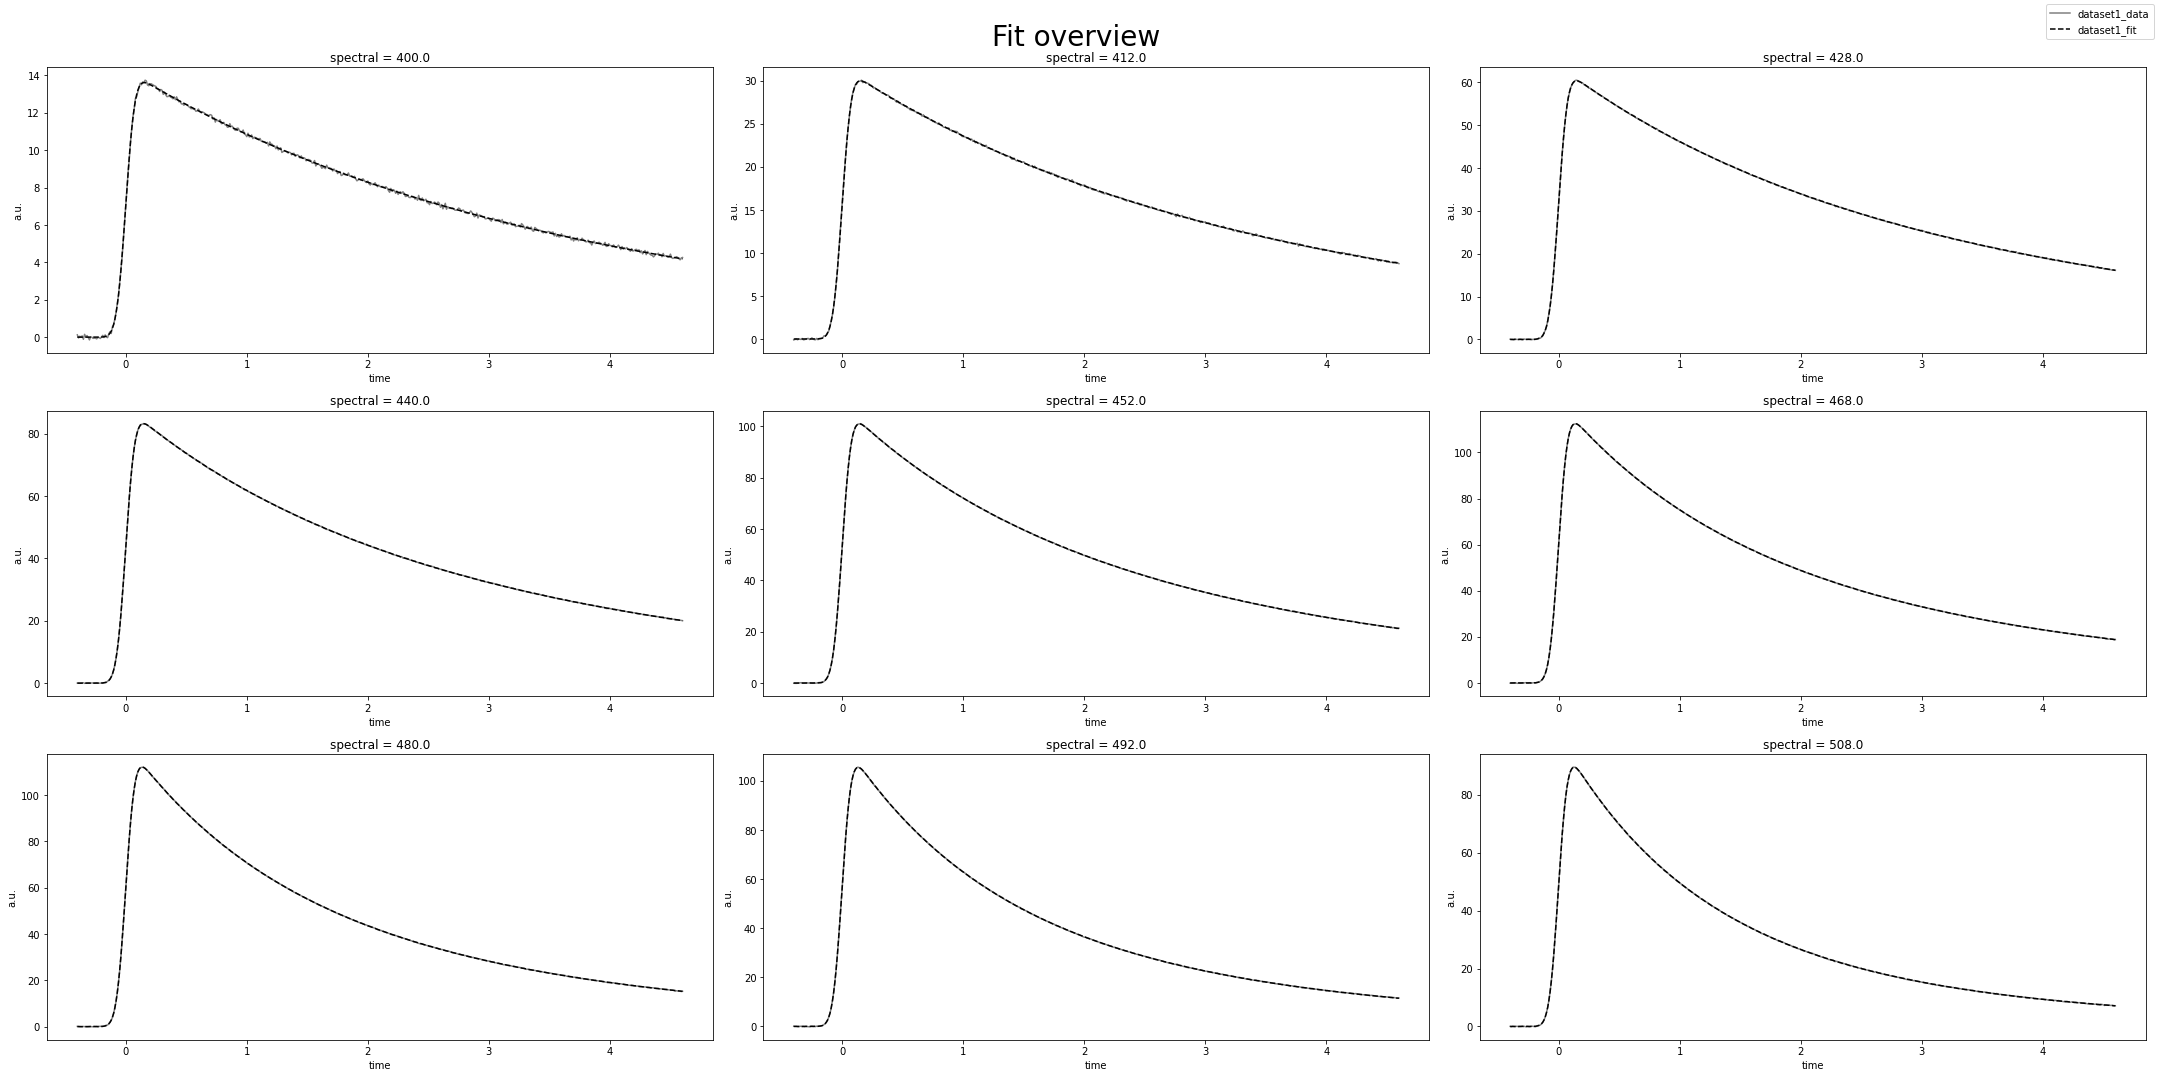

In [17]:
from pyglotaran_extras import plot_fitted_traces, select_plot_wavelengths
from pyglotaran_extras.plotting.style import PlotStyle

wavelengths = select_plot_wavelengths(result)
fig_traces, axes_traces = plot_fitted_traces(
    result, wavelengths, axes_shape=(3, 3), cycler=PlotStyle().data_cycler_solid_dashed
)

### Physical meaning

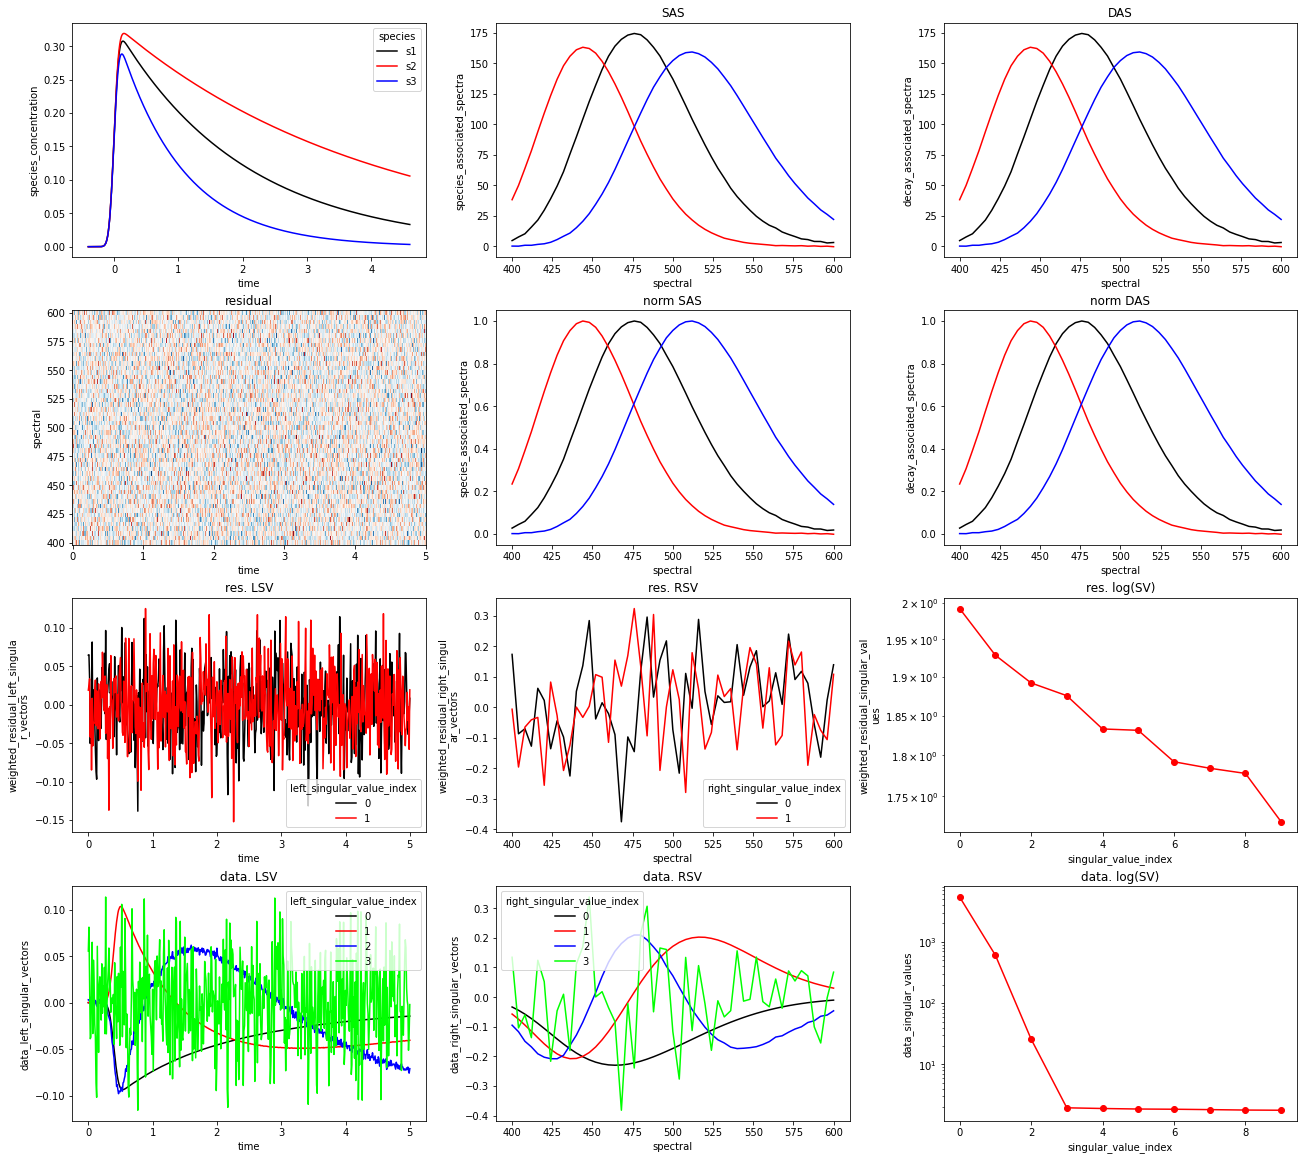

In [15]:
from pyglotaran_extras import plot_overview

fig_ov, axes_ov = plot_overview(result, figure_only=False, linlog=False)